In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('iris.csv')
df

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,virginica
146,146,6.3,2.5,5.0,1.9,virginica
147,147,6.5,3.0,5.2,2.0,virginica
148,148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.head(10)

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
5,5,5.4,3.9,1.7,0.4,setosa
6,6,4.6,3.4,1.4,0.3,setosa
7,7,5.0,3.4,1.5,0.2,setosa
8,8,4.4,2.9,1.4,0.2,setosa
9,9,4.9,3.1,1.5,0.1,setosa


In [6]:
df.columns

Index(['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species'],
      dtype='object')

In [7]:
df.drop('Unnamed: 0',axis=1,inplace = True)

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df['species'].value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

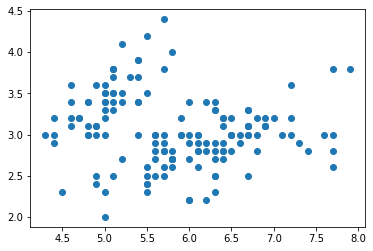

In [11]:
plt.scatter(df['sepal_length'],df['sepal_width'])

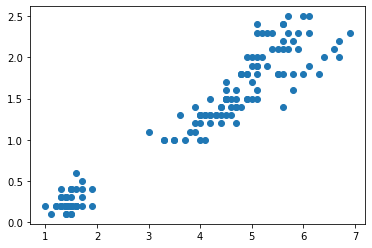

In [13]:
plt.scatter(df['petal_length'],df['petal_width'])

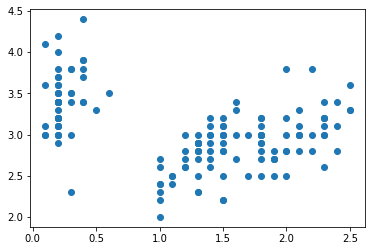

In [14]:
plt.scatter(df['petal_width'],df['sepal_width'])

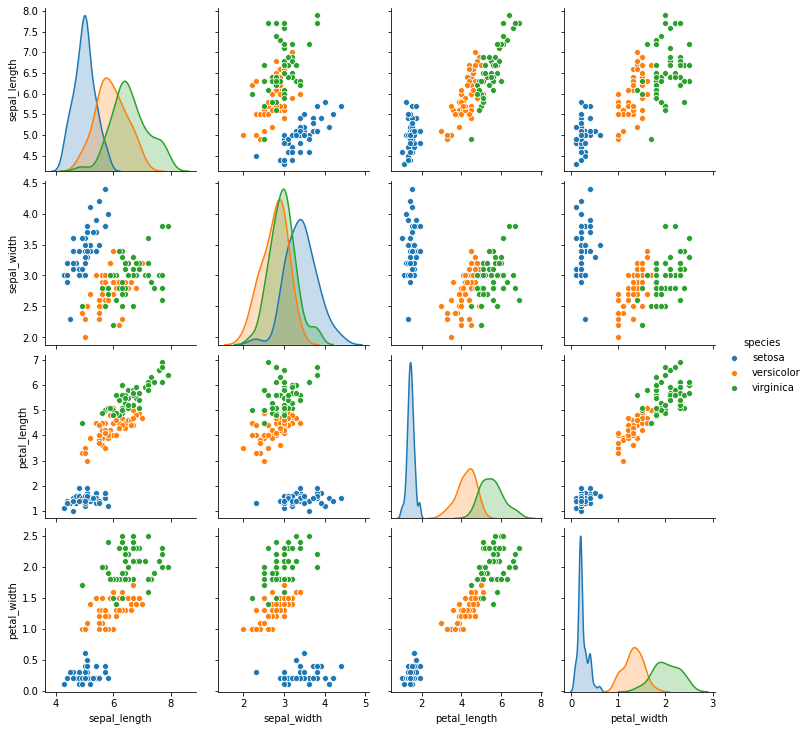

In [15]:
sns.pairplot(df,hue='species')

In [16]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [24]:
df2 = df.loc[:99]

In [25]:
import warnings
warnings.filterwarnings('ignore')

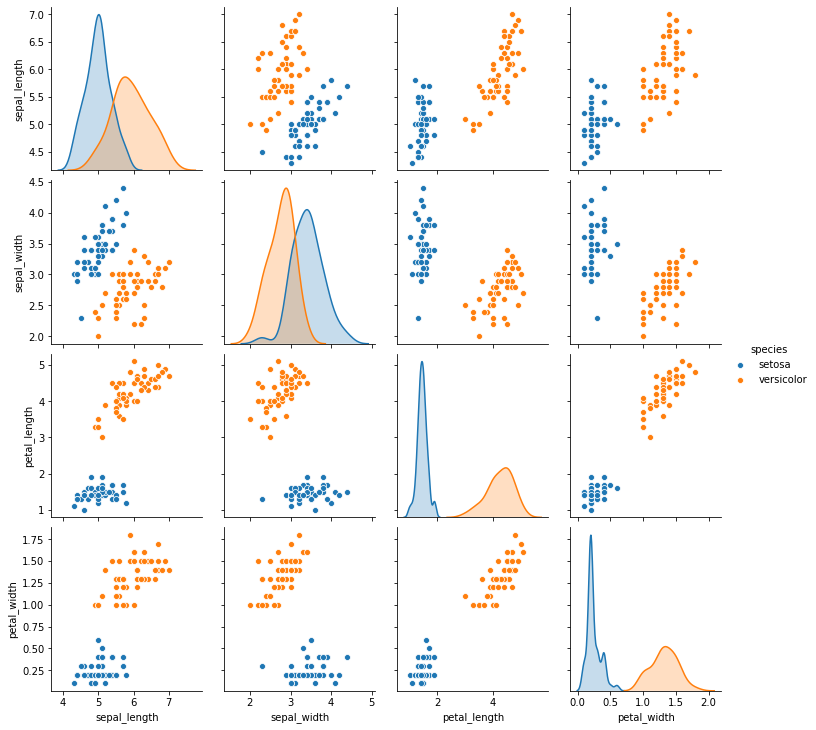

In [26]:
sns.pairplot(df2,hue='species')

In [28]:
from sklearn.model_selection import train_test_split


In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(df2.drop('species',axis=1),df2['species'],test_size=0.25,random_state=101)


In [34]:
xtest.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 16 to 2
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  25 non-null     float64
 1   sepal_width   25 non-null     float64
 2   petal_length  25 non-null     float64
 3   petal_width   25 non-null     float64
dtypes: float64(4)
memory usage: 1000.0 bytes


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   sepal_width   100 non-null    float64
 2   petal_length  100 non-null    float64
 3   petal_width   100 non-null    float64
 4   species       100 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


In [38]:
from sklearn.linear_model import LogisticRegression 


In [41]:
model = LogisticRegression().fit(xtrain,ytrain)

In [42]:
round(model.score(xtest,ytest)*100,2)

100.0

In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
ypred = model.predict(xtest)

In [48]:
print(confusion_matrix(ytest,ypred))

[[15  0]
 [ 0 10]]


In [49]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

